In [1]:
import pandas as pd

# df=pd.read_csv("df_final_2.csv")
X_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]
y_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, -1]
X_test = pd.read_csv('child-mind-institute-problematic-internet-use/test.csv').iloc[:, :-1]
y_test = pd.read_csv('child-mind-institute-problematic-internet-use/test.csv').iloc[:, -1]

# X_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]
# y_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv').iloc[:, -1]
# X_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv').iloc[:, :-1]
# y_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv').iloc[:, -1]

In [ ]:
train_series_data_stats = pd.read_csv('train_series_data_stats.csv')
test_series_data_stats = pd.read_csv('test_series_data_stats.csv')

# train_series_data_stats = pd.read_csv('/kaggle/input/train_series_data_stats.csv')
# test_series_data_stats = pd.read_csv('/kaggle/input/test_series_data_stats.csv')

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def get_aggregations(df, column_groupby, column_agg):

    if not isinstance(column_agg, list):
        column_agg = [column_agg]
    
    # Create the aggregation dictionary
    aggregation_dict = {}
    for col in column_agg:
        aggregation_dict.update({
            f'Median_{col}': (col, 'median'),
            f'Max_{col}': (col, 'max'),
            f'Min_{col}': (col, 'min'),
            f'Sum_{col}': (col, 'sum'),
            f'Std_{col}': (col, 'std'),
            f'Mean_{col}': (col, 'mean')
        })
    
    # Perform groupby and aggregation
    df_agg = df.groupby(column_groupby).agg(**aggregation_dict).reset_index()

    return df_agg

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

def round_final_results(y_pred):
    conditions = [y_test <= 0.5, y_test <= 1.5, y_test <= 2.5, y_test > 2.5]
    choices = [0, 1, 2, 3]
    y_pred_round = np.select(conditions, choices, default=1)
    return y_pred_round

def evaluate_linear_models(X, y, models=None, test_size=0.3, random_state=42):
    # Default models if none are specified
    if models is None:
        models = {
            'LinearRegression': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(),
            'ElasticNet': ElasticNet()
        }

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize dictionary to store QWK scores for each model
    results = {}

    # Iterate over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Round predictions to nearest integers if the target variable is categorical
        y_train_pred_rounded = np.round(y_train_pred).astype(int)
        y_val_pred_rounded = np.round(y_val_pred).astype(int)
        
        # Calculate QWK scores
        qwk_score_train = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')
        qwk_score_val = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')
        
        # Store results
        results[model_name] = {
            "Train QWK Score": qwk_score_train,
            "Validation QWK Score": qwk_score_val
        }

        # Print results for each model
        print(f"Model: {model_name}")
        print(f"Train QWK Score: {qwk_score_train}")
        print(f"Validation QWK Score: {qwk_score_val}\n")

    return results

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_tree_models(X, y, models=None, test_size=0.3, random_state=42):
    # Default models if none are specified
    if models is None:
        models = {
            'DecisionTree': DecisionTreeRegressor(random_state=random_state),
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'GradientBoosting': GradientBoostingRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state)
        }

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize dictionary to store QWK scores for each model
    results = {}

    # Iterate over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Round predictions to nearest integers since the target is categorical
        y_train_pred_rounded = np.round(y_train_pred).astype(int)
        y_val_pred_rounded = np.round(y_val_pred).astype(int)
        
        # Calculate QWK scores
        qwk_score_train = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')
        qwk_score_val = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')
        
        # Store results
        results[model_name] = {
            "Train QWK Score": qwk_score_train,
            "Validation QWK Score": qwk_score_val
        }

        # Print results for each model
        print(f"Model: {model_name}")
        print(f"Train QWK Score: {qwk_score_train}")
        print(f"Validation QWK Score: {qwk_score_val}\n")

    return results

# Usage example
# X and y should be your features and target variable DataFrames/Series
# results = evaluate_tree_models(X_train, y_train)



In [4]:
merged_data = X_train.merge(train_series_data_stats, how='left', on='id')

In [5]:
merged_data_df = merged_data.select_dtypes(include='number')
correlation_matrix = merged_data_df.corr()

In [6]:
# correlation_matrix.to_excel('corr_matrix.xlsx')

In [7]:
stat_columns = [col for col in merged_data_df.columns if col.startswith("stat")]

In [8]:
X_train = merged_data

In [9]:
other_columns = []
column_groupby = 'PCIAT-PCIAT_Total'
column_agg=['FGC-FGC_CU','Physical-Systolic_BP','Physical-Diastolic_BP','Physical-BMI','BIA-BIA_BMC','BIA-BIA_BMI','Basic_Demos-Age','Basic_Demos-Sex'] + stat_columns
# column_agg=['FGC-FGC_CU','Physical-Systolic_BP','Physical-Diastolic_BP','Physical-BMI'] # 0.152

df_agg = get_aggregations(X_train, column_groupby=column_groupby, column_agg=column_agg)

for column in df_agg.columns:
    df_agg[column] = df_agg[column].fillna(df_agg[column].mean())

In [10]:
# from sklearn.preprocessing import PolynomialFeatures

# # Verificar pra calcular separadamente ou tudo junto polinomios e relacoes se adicionar mais de uma coluna
# poly_df = get_polynomial_features(df_agg, columns=column_agg, degree=2)

# df_agg = pd.concat([df_agg, poly_df], axis=1)

In [11]:
print(f'Features with highest correlation to {column_groupby} \n')
columns_corr=[]
for column in column_agg:

    corr_df = df_agg.loc[:, df_agg.columns[df_agg.columns.str.endswith(column)].tolist()]
    corr_df[column_groupby] = df_agg[column_groupby]
    correlation_matrix = corr_df.corr()
    feature_highest_corr = correlation_matrix[column_groupby].drop(column_groupby).abs().idxmax()
    feature_corr_value = correlation_matrix[column_groupby].drop(column_groupby).abs().max()
    print(f'{feature_highest_corr}: {feature_corr_value} \n')

    columns_corr.append(feature_highest_corr)

print(columns_corr)

Features with highest correlation to PCIAT-PCIAT_Total 

Median_FGC-FGC_CU: 0.6644843180692392 

Min_Physical-Systolic_BP: 0.6429503351979634 

Min_Physical-Diastolic_BP: 0.6151229554265928 

Median_Physical-BMI: 0.65414920713236 

Median_BIA-BIA_BMC: 0.673042684902567 

Min_BIA-BIA_BMI: 0.6592806566970287 

Mean_Basic_Demos-Age: 0.910153146014278 

Sum_Basic_Demos-Sex: 0.6056946649630189 

Sum_stat_0: 0.5551210715597527 

Sum_stat_1: 0.5551210715597527 

Sum_stat_2: 0.5551210715597527 

Sum_stat_3: 0.5551210715597527 

Sum_stat_4: 0.5551210715597527 

Sum_stat_5: 0.5551210715597527 

Sum_stat_6: 0.5551210715597527 

Sum_stat_7: 0.5551210715597527 

Sum_stat_8: 0.5551210715597527 

Sum_stat_9: 0.5551210715597527 

Sum_stat_10: 0.5551210715597527 

Sum_stat_11: 0.5551210715597527 

Max_stat_12: 0.5846451520385825 

Min_stat_13: 0.35911809334244493 

Sum_stat_14: 0.5434079455039965 

Max_stat_15: 0.5856244176914472 

Sum_stat_16: 0.5402081876500501 

Sum_stat_17: 0.478019697883667 

Sum_

<ipython-input-11-af4577e6ae9b>:8: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  feature_highest_corr = correlation_matrix[column_groupby].drop(column_groupby).abs().idxmax()
<ipython-input-11-af4577e6ae9b>:8: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  feature_highest_corr = correlation_matrix[column_groupby].drop(column_groupby).abs().idxmax()


In [12]:
columns_corr = [item for item in columns_corr if item is not None and not (isinstance(item, float) and np.isnan(item))]

In [13]:
# all_columns = other_columns + [column_groupby] + columns_corr
all_columns = [column_groupby] + columns_corr + other_columns

In [14]:
columns_df_agg = [column_groupby] + columns_corr 
df_agg = df_agg.loc[:, columns_df_agg]

In [15]:
df_agg.describe()

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Mean_Basic_Demos-Age,Sum_Basic_Demos-Sex,Sum_stat_0,...,Sum_stat_86,Sum_stat_87,Sum_stat_88,Sum_stat_89,Sum_stat_90,Sum_stat_91,Sum_stat_92,Sum_stat_93,Sum_stat_94,Max_stat_95
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000
mean,46.075269,12.445055,94.763441,50.559140,19.788974,4.494338,15.568655,11.476051,10.720430,3.382464e+06,...,20.087548,39.349031,951.964441,6.967742,25014.088152,44767.760758,9.241359e+14,74.258065,28.010753,228.872093
std,27.112983,6.410102,16.542040,10.927093,4.013770,1.103305,4.593786,1.988782,13.655995,4.156603e+06,...,27.172797,52.922134,1190.831888,8.099184,31913.658003,55883.147804,1.153436e+15,92.755746,36.182056,147.779712
min,0.000000,3.000000,49.000000,11.000000,15.515430,2.794585,0.048267,7.678571,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-52.000000
25%,23.000000,8.000000,87.000000,45.000000,17.570840,3.651295,13.487900,10.034483,3.000000,7.792560e+05,...,5.214520,10.452697,267.958488,2.000000,5457.549988,12456.000000,2.591850e+14,21.000000,7.000000,95.000000
50%,46.000000,11.000000,93.000000,50.000000,18.618419,4.342710,14.225500,11.384615,9.000000,2.846621e+06,...,14.676479,30.762908,803.509445,6.000000,18945.199951,37570.333496,7.769350e+14,63.000000,24.000000,228.872093
75%,69.000000,14.000000,101.000000,56.000000,19.933707,4.914095,16.238800,12.769231,16.000000,4.655966e+06,...,29.146603,56.460919,1387.328873,9.000000,34997.166748,66547.166504,1.375780e+15,107.000000,40.000000,324.000000
max,93.000000,35.000000,166.000000,87.000000,39.339185,8.182705,39.343500,17.000000,116.000000,3.579265e+07,...,240.069235,468.019582,10430.769112,68.000000,276951.082718,488469.416504,1.008740e+16,811.000000,316.000000,748.000000


In [16]:
# columns = [column_groupby]
# columns = columns + columns_corr + other_columns
# print(columns)
new_X_train = X_train.merge(df_agg, how='left', on=column_groupby)[all_columns]

In [17]:
for column in df_agg.columns:
    new_X_train[column] = new_X_train[column].fillna(df_agg[column].mean())

In [18]:
for column in other_columns:
    new_X_train[column] = new_X_train[column].fillna(new_X_train[column].mean())

In [19]:
new_X_train.isna().sum()
len(new_X_train)

3960

In [20]:
new_df_train = new_X_train.select_dtypes(include='number')
correlation_matrix = new_df_train.corr()

In [21]:
correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Mean_Basic_Demos-Age,Sum_Basic_Demos-Sex,Sum_stat_0,...,Sum_stat_86,Sum_stat_87,Sum_stat_88,Sum_stat_89,Sum_stat_90,Sum_stat_91,Sum_stat_92,Sum_stat_93,Sum_stat_94,Max_stat_95
PCIAT-PCIAT_Total,1.000000,0.798315,0.602366,0.533076,0.755443,0.760010,0.589979,0.923471,-0.629401,-0.599283,...,-0.595005,-0.597530,-0.596870,-0.595407,-0.600774,-0.597713,-0.597687,-0.597533,-0.595960,-0.635659
Median_FGC-FGC_CU,0.798315,1.000000,NaN,NaN,0.675867,0.747832,NaN,0.820947,-0.517403,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min_Physical-Systolic_BP,0.602366,NaN,1.000000,0.619203,0.516170,NaN,NaN,0.621598,-0.681920,-0.676105,...,-0.674326,-0.677276,-0.677929,-0.661836,-0.675657,-0.678382,-0.678067,-0.678050,-0.679676,-0.662929
Min_Physical-Diastolic_BP,0.533076,NaN,0.619203,1.000000,NaN,NaN,NaN,0.522276,-0.532994,-0.538220,...,-0.532851,-0.535288,-0.536920,-0.533278,-0.537657,-0.537475,-0.537161,-0.536607,-0.535490,-0.533781
Median_Physical-BMI,0.755443,0.675867,0.516170,NaN,1.000000,0.670244,0.619822,0.808789,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sum_stat_91,-0.597713,NaN,-0.678382,-0.537475,NaN,-0.506546,NaN,-0.630456,0.992444,0.998885,...,0.998923,0.998970,0.999985,0.995604,0.999387,1.000000,0.999996,0.999977,0.999181,0.850744
Sum_stat_92,-0.597687,NaN,-0.678067,-0.537161,NaN,-0.506617,NaN,-0.630570,0.992453,0.998888,...,0.998935,0.998994,0.999989,0.995597,0.999399,0.999996,1.000000,0.999981,0.999201,0.850349
Sum_stat_93,-0.597533,NaN,-0.678050,-0.536607,NaN,-0.506953,NaN,-0.630855,0.992535,0.999002,...,0.998925,0.998956,0.999970,0.995749,0.999378,0.999977,0.999981,1.000000,0.999165,0.849968
Sum_stat_94,-0.595960,NaN,-0.679676,-0.535490,NaN,-0.505341,NaN,-0.629893,0.991099,0.997773,...,0.998542,0.998694,0.999179,0.993940,0.998624,0.999181,0.999201,0.999165,1.000000,0.849489


In [22]:
correlation_matrix.to_excel('corr_matrix_05.xlsx')

In [361]:
from sklearn.model_selection import train_test_split

df = pd.concat([new_X_train, y_train], axis=1)
df = df[df['sii'].notna()]
X = df.iloc[:, :-1]
y = df['sii']
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)


In [362]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_split, y_train_split)
test_score = reg.score(X_test_split, y_test_split)
print(f'Test Score: {test_score}')

Test Score: 0.7859625544937582


In [363]:
null_indexes = y_train[y_train.isna()].index

In [364]:
X_null = new_X_train.iloc[null_indexes] 

In [365]:
y_pred = reg.predict(X_null) 

(array([   0.,    0.,    0.,    0.,    0., 1224.,    0.,    0.,    0.,
           0.]),
 array([0.61999809, 0.71999809, 0.81999809, 0.91999809, 1.01999809,
        1.11999809, 1.21999809, 1.31999809, 1.41999809, 1.51999809,
        1.61999809]),
 <BarContainer object of 10 artists>)

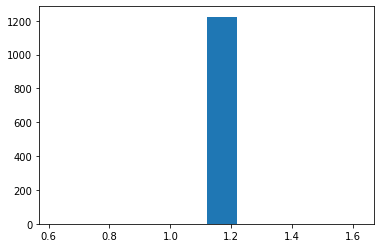

In [366]:
import matplotlib.pyplot as plt
plt.hist(y_pred)

In [367]:
y_train.iloc[null_indexes] = y_pred

In [368]:
y_train = np.round(y_train)

In [369]:
X_train = new_X_train.drop(columns=column_groupby)

In [370]:
evaluate_linear_models(X_train, y_train)

Model: LinearRegression
Train QWK Score: 0.8117190184832834
Validation QWK Score: 0.7969554714917279

Model: Ridge
Train QWK Score: 0.5934244856975064
Validation QWK Score: 0.5969253017133033



c:\Users\Mariana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.104e+02, tolerance: 1.233e-01
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
Train QWK Score: 0.4753403252803391
Validation QWK Score: 0.46815042210283964

Model: ElasticNet
Train QWK Score: 0.7052051488364381
Validation QWK Score: 0.7071813801724189



c:\Users\Mariana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.501e+02, tolerance: 1.233e-01
  model = cd_fast.enet_coordinate_descent(


{'LinearRegression': {'Train QWK Score': np.float64(0.8117190184832834),
  'Validation QWK Score': np.float64(0.7969554714917279)},
 'Ridge': {'Train QWK Score': np.float64(0.5934244856975064),
  'Validation QWK Score': np.float64(0.5969253017133033)},
 'Lasso': {'Train QWK Score': np.float64(0.4753403252803391),
  'Validation QWK Score': np.float64(0.46815042210283964)},
 'ElasticNet': {'Train QWK Score': np.float64(0.7052051488364381),
  'Validation QWK Score': np.float64(0.7071813801724189)}}

In [371]:
# evaluate_tree_models(X_train, y_train)

In [372]:
local_X_train, local_X_test, local_y_train, local_y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [373]:
reg_2 = LinearRegression()
reg_2.fit(local_X_train, local_y_train)

LinearRegression()

In [374]:
X_train

,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Mean_Basic_Demos-Age,Sum_Basic_Demos-Sex,Sum_stat_0,Sum_stat_1,...,Sum_stat_86,Sum_stat_87,Sum_stat_88,Sum_stat_89,Sum_stat_90,Sum_stat_91,Sum_stat_92,Sum_stat_93,Sum_stat_94,Max_stat_95
0,10.500000,93.000000,55.00000,17.677979,4.255510,16.238800,12.588235,3.00000,2.255184e+06,2.255184e+06,...,9.238340,19.461450,620.294266,6.000000,14897.683472,29180.000000,6.047650e+14,46.000000,19.000000,198.000000
1,5.000000,62.000000,34.00000,16.384381,3.107800,12.636700,7.881789,116.00000,3.579265e+07,3.579265e+07,...,240.069235,468.019582,10430.769112,68.000000,276951.082718,488469.416504,1.008740e+16,811.000000,316.000000,748.000000
2,10.000000,85.000000,39.00000,17.093043,3.765365,13.470000,10.187500,19.00000,5.873187e+06,5.873187e+06,...,30.508528,59.678184,1429.152367,14.000000,38950.733154,66873.000000,1.382320e+15,112.000000,38.000000,332.000000
3,14.000000,94.000000,44.00000,20.170728,4.714730,13.201600,11.805556,11.00000,3.553243e+06,3.553243e+06,...,30.614478,52.840581,1163.117912,8.000000,27343.783142,54364.500000,1.122750e+15,91.000000,33.000000,271.000000
4,12.445055,94.763441,50.55914,19.788974,4.494338,15.568655,11.476051,10.72043,3.382464e+06,3.382464e+06,...,20.087548,39.349031,951.964441,6.967742,25014.088152,44767.760758,9.241359e+14,74.258065,28.010753,228.872093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,12.000000,97.000000,48.00000,17.631067,4.087070,11.434000,10.875000,14.00000,3.579147e+06,3.579147e+06,...,21.076339,35.878238,977.225891,7.000000,25873.299988,45924.000000,9.496500e+14,77.000000,27.000000,276.000000
3956,12.445055,94.763441,50.55914,19.788974,4.494338,15.568655,11.476051,10.72043,3.382464e+06,3.382464e+06,...,20.087548,39.349031,951.964441,6.967742,25014.088152,44767.760758,9.241359e+14,74.258065,28.010753,228.872093
3957,11.000000,98.000000,42.00000,19.406721,4.669360,12.654100,11.492308,28.00000,8.362262e+06,8.362262e+06,...,51.230740,89.045863,2305.961311,19.000000,61661.349945,110518.000000,2.246205e+15,179.000000,64.000000,435.000000
3958,10.000000,87.000000,53.00000,16.779041,3.195550,12.237200,9.511111,23.00000,5.734846e+06,5.734846e+06,...,30.398354,59.350381,1605.652397,13.000000,41157.449890,75201.000000,1.554580e+15,126.000000,49.000000,324.000000


In [375]:
reg_2.score(local_X_test, local_y_test)

0.6979122551599705

In [376]:
local_y_pred = reg_2.predict(local_X_test)
local_y_train_pred = reg_2.predict(local_X_train)

# conditions = [local_y_pred <= 0, local_y_pred <= 1, local_y_pred <= 2, local_y_pred <= 3]
# choices = [0, 1, 2, 3]
# local_y_pred = np.select(conditions, choices, default=1)

local_y_pred = np.round(local_y_pred).astype(int)
local_y_train_pred = np.round(local_y_train_pred).astype(int)

In [377]:
from sklearn.metrics import cohen_kappa_score

qwk_score_train = cohen_kappa_score(local_y_train, local_y_train_pred, weights='quadratic')
qwk_score_val = cohen_kappa_score(local_y_test, local_y_pred, weights='quadratic')
print("Train QWK Score:", qwk_score_train)
print("Validation QWK Score:", qwk_score_val)


Train QWK Score: 0.7949175265914881
Validation QWK Score: 0.8154700107930308


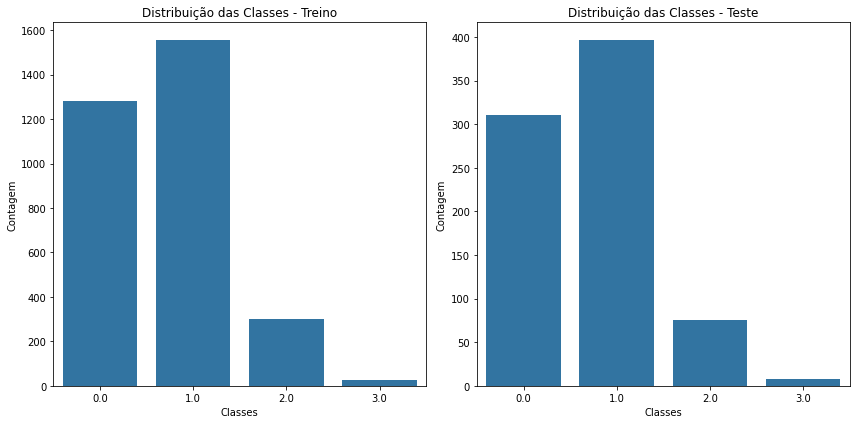

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que você tenha um DataFrame `train` e `test`, e a coluna `target` contém a variável alvo
plt.figure(figsize=(12, 6))

# Treino
plt.subplot(1, 2, 1)
sns.countplot(x='sii', data=pd.DataFrame(local_y_train))
plt.title('Distribuição das Classes - Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Teste
plt.subplot(1, 2, 2)
sns.countplot(x='sii', data=pd.DataFrame(local_y_test))
plt.title('Distribuição das Classes - Teste')
plt.xlabel('Classes')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [379]:
# for column in columns_corr:
#     plt.figure(figsize=(12, 6))

#     # Treino
#     sns.kdeplot(local_X_train[column], label='Treino', color='blue')
#     sns.kdeplot(local_X_test[column], label='Teste', color='red')
#     plt.title(f'Distribuição {column} - Treino vs Teste')
#     plt.xlabel('Valores da Feature')
#     plt.ylabel('Densidade')
#     plt.legend()
#     plt.show()

In [380]:
all_columns

['PCIAT-PCIAT_Total',
 'Median_FGC-FGC_CU',
 'Min_Physical-Systolic_BP',
 'Min_Physical-Diastolic_BP',
 'Median_Physical-BMI',
 'Median_BIA-BIA_BMC',
 'Min_BIA-BIA_BMI',
 'Mean_Basic_Demos-Age',
 'Sum_Basic_Demos-Sex',
 'Sum_stat_0',
 'Sum_stat_1',
 'Sum_stat_2',
 'Sum_stat_3',
 'Sum_stat_4',
 'Sum_stat_5',
 'Sum_stat_6',
 'Sum_stat_7',
 'Sum_stat_8',
 'Sum_stat_9',
 'Sum_stat_10',
 'Sum_stat_11',
 'Max_stat_12',
 'Min_stat_13',
 'Sum_stat_14',
 'Max_stat_15',
 'Sum_stat_16',
 'Sum_stat_17',
 'Sum_stat_18',
 'Sum_stat_19',
 'Sum_stat_20',
 'Sum_stat_21',
 'Sum_stat_22',
 'Max_stat_23',
 'Max_stat_24',
 'Sum_stat_25',
 'Sum_stat_26',
 'Max_stat_27',
 'Sum_stat_28',
 'Sum_stat_29',
 'Sum_stat_30',
 'Sum_stat_31',
 'Sum_stat_32',
 'Sum_stat_33',
 'Sum_stat_34',
 'Sum_stat_35',
 'Sum_stat_36',
 'Min_stat_37',
 'Sum_stat_38',
 'Mean_stat_39',
 'Sum_stat_40',
 'Sum_stat_43',
 'Sum_stat_44',
 'Sum_stat_45',
 'Sum_stat_46',
 'Max_stat_47',
 'Sum_stat_48',
 'Sum_stat_49',
 'Sum_stat_50',
 'Sum_

In [381]:
column_agg
# print(columns_agg_after)

['FGC-FGC_CU',
 'Physical-Systolic_BP',
 'Physical-Diastolic_BP',
 'Physical-BMI',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'stat_0',
 'stat_1',
 'stat_2',
 'stat_3',
 'stat_4',
 'stat_5',
 'stat_6',
 'stat_7',
 'stat_8',
 'stat_9',
 'stat_10',
 'stat_11',
 'stat_12',
 'stat_13',
 'stat_14',
 'stat_15',
 'stat_16',
 'stat_17',
 'stat_18',
 'stat_19',
 'stat_20',
 'stat_21',
 'stat_22',
 'stat_23',
 'stat_24',
 'stat_25',
 'stat_26',
 'stat_27',
 'stat_28',
 'stat_29',
 'stat_30',
 'stat_31',
 'stat_32',
 'stat_33',
 'stat_34',
 'stat_35',
 'stat_36',
 'stat_37',
 'stat_38',
 'stat_39',
 'stat_40',
 'stat_41',
 'stat_42',
 'stat_43',
 'stat_44',
 'stat_45',
 'stat_46',
 'stat_47',
 'stat_48',
 'stat_49',
 'stat_50',
 'stat_51',
 'stat_52',
 'stat_53',
 'stat_54',
 'stat_55',
 'stat_56',
 'stat_57',
 'stat_58',
 'stat_59',
 'stat_60',
 'stat_61',
 'stat_62',
 'stat_63',
 'stat_64',
 'stat_65',
 'stat_66',
 'stat_67',
 'stat_68',
 'stat_69',
 'stat_70',
 's

In [382]:
merged_data_X_test = X_test.merge(test_series_data_stats, how='left', on='id')

In [383]:
for column in other_columns:
    merged_data_X_test[column] = merged_data_X_test[column].fillna(new_X_train[column].mean())

In [384]:
X_test_predict = merged_data_X_test.loc[:, column_agg + other_columns]

In [385]:
for column in column_agg:
    index = column_agg.index(column)
    if X_test_predict[column].isna().sum() > 0:
        try:
            X_test_predict[columns_corr[index]] = X_test_predict[column].fillna(df_agg[columns_corr[index]].mean())
        except:
            print(index)
    else:
        X_test_predict[columns_corr[index]] = X_test_predict[column]

102
103


<ipython-input-385-4db0297c3fc1>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_predict[columns_corr[index]] = X_test_predict[column].fillna(df_agg[columns_corr[index]].mean())
<ipython-input-385-4db0297c3fc1>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_predict[columns_corr[index]] = X_test_predict[column].fillna(df_agg[columns_corr[index]].mean())
<ipython-input-385-4db0297c3fc1>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [386]:
X_test_predict = X_test_predict.loc[:, columns_corr + other_columns]

In [387]:
y_test = reg_2.predict(X_test_predict)

In [388]:
y_test

array([ 1.40462756e-01, -3.70948390e-02,  1.42614439e+00, -2.51590885e+12,
        1.77636077e+00, -2.50719318e+12,  2.27799071e-01,  1.21470223e-01,
        1.64159867e+00,  1.83156358e+00,  1.38994104e+00,  1.42078740e+00,
        2.31772168e+00,  9.85087987e-01,  1.47599021e+00,  9.36623689e-01,
       -1.87387369e-02,  8.70877887e-01,  1.20815668e+00,  1.36558458e+00])

In [389]:
y_test_round = np.round(y_test).astype(int)

In [390]:
y_test_round = round_final_results(y_test_round)

In [391]:
print(y_test_round)

[0 0 1 0 2 0 0 0 2 2 1 1 2 1 1 1 0 1 1 1]


In [392]:
df_y_test = pd.DataFrame({'id': X_test['id'], 'sii': y_test_round})

In [393]:
from datetime import datetime
df_y_test.to_csv(f'submission.csv', index=False)

In [394]:
df_y_test

,id,sii
0,00008ff9,0
1,000fd460,0
2,00105258,1
3,00115b9f,0
4,0016bb22,2
5,001f3379,0
6,0038ba98,0
7,0068a485,0
8,0069fbed,2
9,0083e397,2


In [ ]:
# pd.concat([X_train,y_train], axis=1).to_csv('df_final_to_powerbi_2.csv')